In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mk823-dev/VisualizationProjectData/main/Data%20Science%20Salary%202021%20to%202023.csv')

In [20]:
#  Replace values in experience-level column
df['experience_level'] = df['experience_level'].replace('EN', 'Entry-Level')
df['experience_level'] = df['experience_level'].replace('EX', 'Experienced')
df['experience_level'] = df['experience_level'].replace('MI', 'Mid-Level')
df['experience_level'] = df['experience_level'].replace('SE', 'Senior')
#Replace values in employment_type column
df['employment_type'] = df['employment_type'].replace('FT', 'Full-Time')
df['employment_type'] = df['employment_type'].replace('CT', 'Contractor')
df['employment_type'] = df['employment_type'].replace('FL', 'Freelancer')
df['employment_type'] = df['employment_type'].replace('PT', 'Part-Time')
#Replace values in Company size column
df['company_size'] = df['company_size'].replace('L', "Large")
df['company_size'] = df['company_size'].replace('M', "Medium")
df['company_size'] = df['company_size'].replace('S', "Small")

#show the dataset top row result
styled_df = df.head(5).style.set_properties(**{'background-color': '##f8f9fa ','color':'black','border-color':'#dee2e6',
                                               'border-collapse':'collapse','font-family': 'Arial, sans-serif','font-size': '15px'})
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'black'), ("background-color", "#e9ecef"),("color", 'black'), 
        ("background-color", "#e9ecef"), ("border", "1px solid #dee2e6"), ("padding", "5px"),("text-align", "left")]}
])

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,Entry-Level,Full-Time,Applied Scientist,213660,USD,213660,US,Large
1,2023,Entry-Level,Full-Time,Applied Scientist,130760,USD,130760,US,Large
2,2023,Entry-Level,Full-Time,Data Quality Analyst,100000,USD,100000,NG,Large
3,2023,Entry-Level,Full-Time,Compliance Data Analyst,30000,USD,30000,NG,Large
4,2023,Entry-Level,Full-Time,Applied Scientist,204620,USD,204620,US,Large


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


In [6]:
df.describe()


,work_year,salary,salary_in_usd
count,3761.000000,3.761000e+03,3761.000000
mean,2022.374103,1.905999e+05,137555.178942
std,0.691252,6.711457e+05,63022.267974
min,2020.000000,6.000000e+03,5132.000000
25%,2022.000000,1.000000e+05,95000.000000
50%,2022.000000,1.375000e+05,135000.000000
75%,2023.000000,1.800000e+05,175000.000000
max,2023.000000,3.040000e+07,450000.000000


In [7]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'company_location',
       'company_size'],
      dtype='object')

In [8]:
df.isnull().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

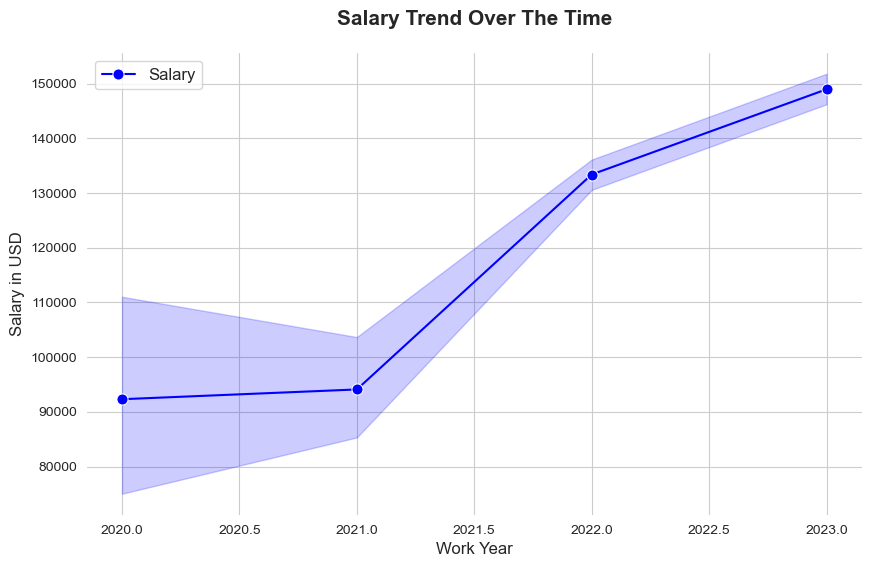

In [42]:
# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Sort the dataframe and plot the data
df_sorted = df.sort_values(by='work_year')
sns.lineplot(data=df_sorted, x='work_year', y='salary_in_usd', marker='o', linestyle='-', color='Blue', markersize=8)

# Set the title and legend
plt.title('Salary Trend Over The Time', fontsize=15, fontweight='bold', pad=20)
plt.legend(['Salary'], loc='best', fontsize=12)

# Customize the background color and remove grid lines
sns.despine(left=True, bottom=True)

# Set x and y labels
plt.xlabel('Work Year', fontsize=12)
plt.ylabel('Salary in USD', fontsize=12)

# Show the plot
plt.show()

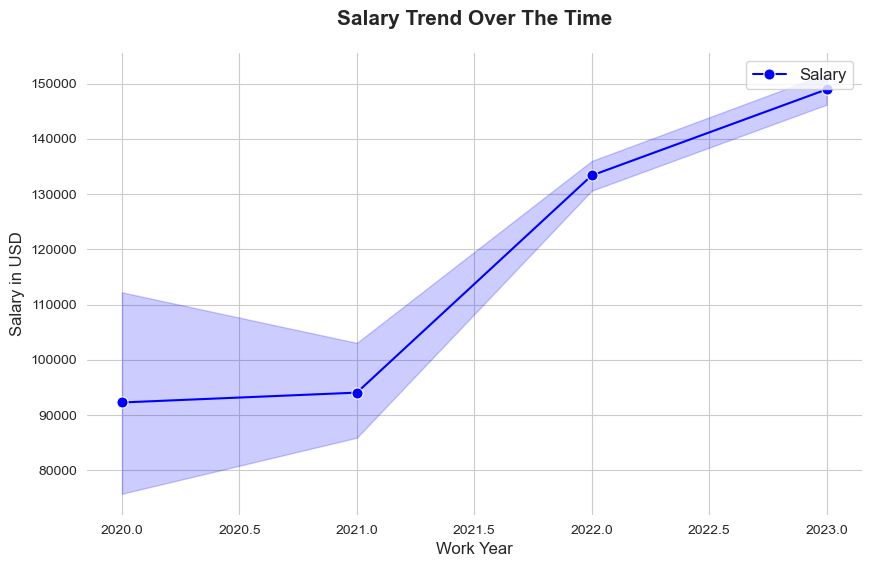

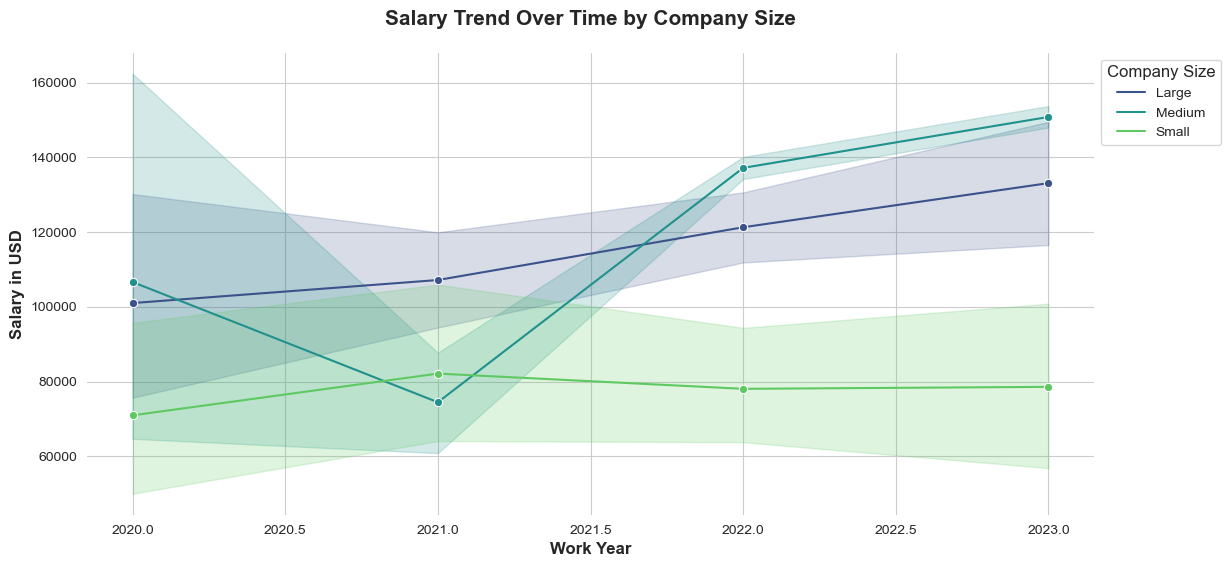

In [24]:
# Set the figure size and style
plt.figure(figsize=(13, 6))
sns.set_style("whitegrid")

# Plot the data
sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='company_size', marker='o', palette='viridis')

# Set the title, labels, and legend
plt.title('Salary Trend Over Time by Company Size', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Work Year', fontsize=12, fontweight='bold')
plt.ylabel('Salary in USD', fontsize=12, fontweight='bold')
plt.legend(title='Company Size', title_fontsize=12, fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Customize the background color and remove grid lines
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()


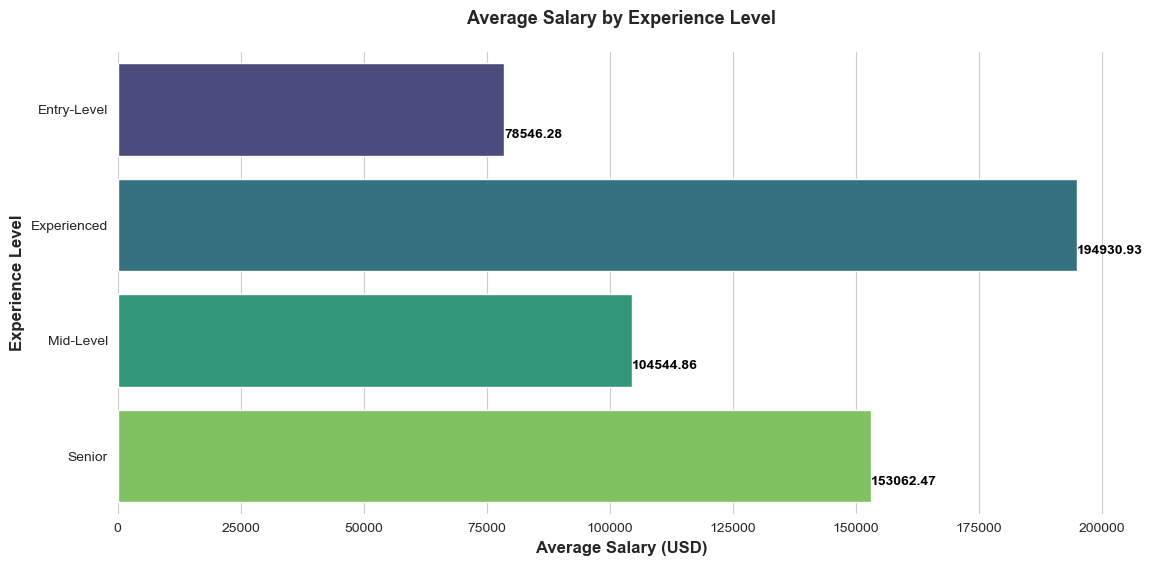

In [26]:
# Calculate the average salary by experience level
exp_salary = df.groupby('experience_level')['salary_in_usd'].mean()

# Set the figure size and style
plt.figure(figsize=(13, 6))
sns.set_style("whitegrid")

# Create the horizontal bar plot with a color map
ax = sns.barplot(x=exp_salary.values, y=exp_salary.index, palette='viridis')

# Set the title and labels
plt.title('Average Salary by Experience Level', fontsize=13, fontweight='bold', pad=20)
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Experience Level', fontsize=12, fontweight='bold')

# Add data labels
for i, v in enumerate(exp_salary.values):
    ax.text(v + 3, i + .25, str(round(v, 2)), color='black', fontweight='bold')

# Customize the background color and remove grid lines
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

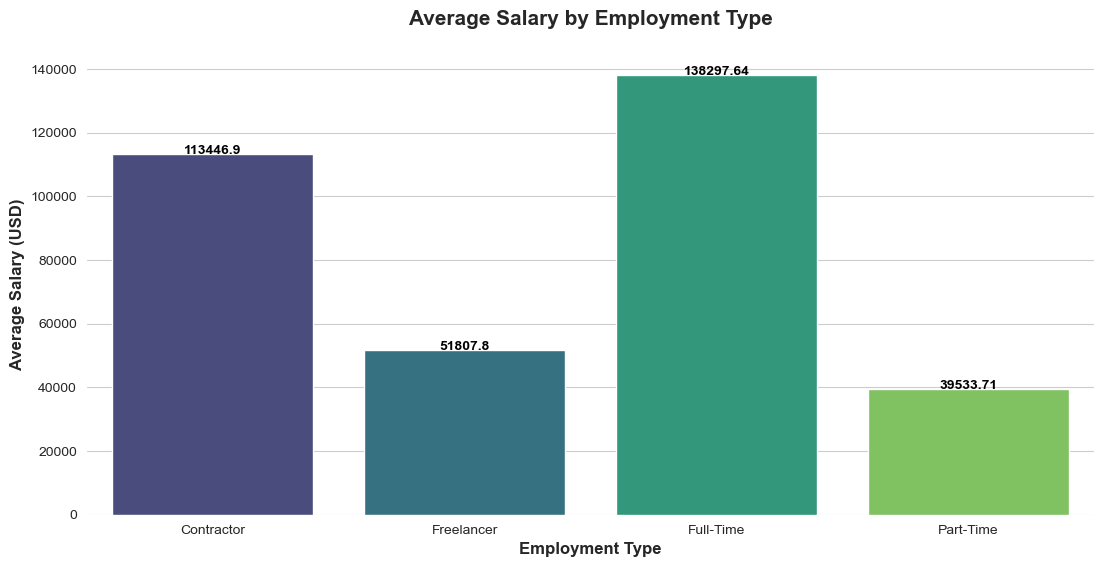

In [27]:
# Calculate the average salary by employment type
emp_salary = df.groupby('employment_type')['salary_in_usd'].mean()

# Set the figure size and style
plt.figure(figsize=(13, 6))
sns.set_style("whitegrid")

# Create the bar plot with a color map
ax = sns.barplot(x=emp_salary.index, y=emp_salary.values, palette='viridis')

# Set the title and labels
plt.title('Average Salary by Employment Type', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Employment Type', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

# Add data labels
for i, v in enumerate(emp_salary.values):
    ax.text(i, v + 3, str(round(v, 2)), color='black', fontweight='bold', ha='center')

# Customize the background color and remove grid lines
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

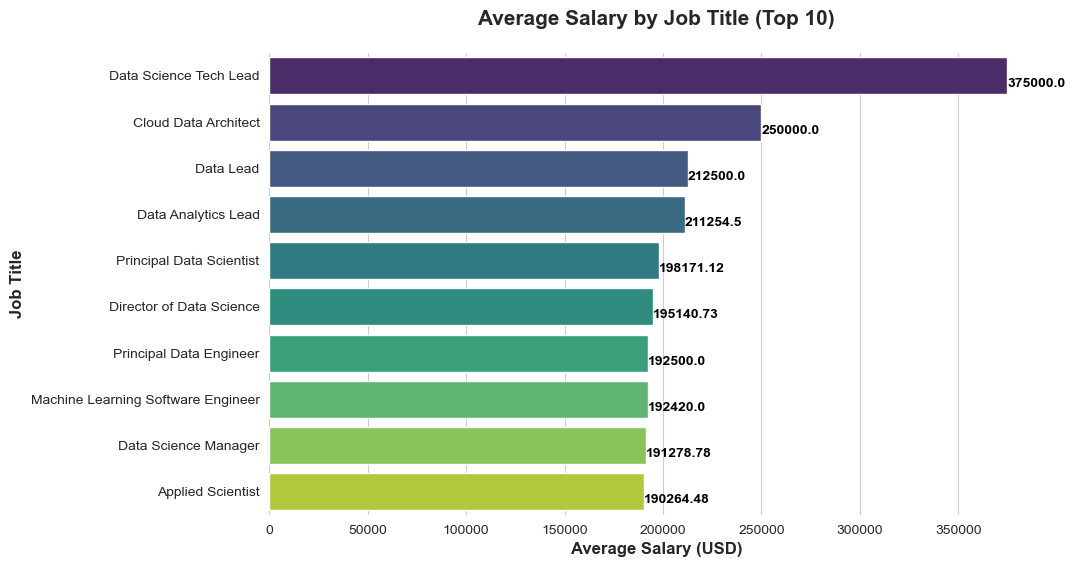

In [54]:
# Group data by 'job_title' and calculate the average salary for each title
job_title_salary = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the bar plot
ax = sns.barplot(x=job_title_salary.values[:10], y=job_title_salary.index[:10], palette='viridis')

# Set the title and labels
plt.title('Average Salary by Job Title (Top 10)', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')

# Add data labels
for i, v in enumerate(job_title_salary.values[:10]):
    ax.text(v + 3, i + .25, str(round(v, 2)), color='black', fontweight='bold')

# Customize the background color and remove grid lines
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

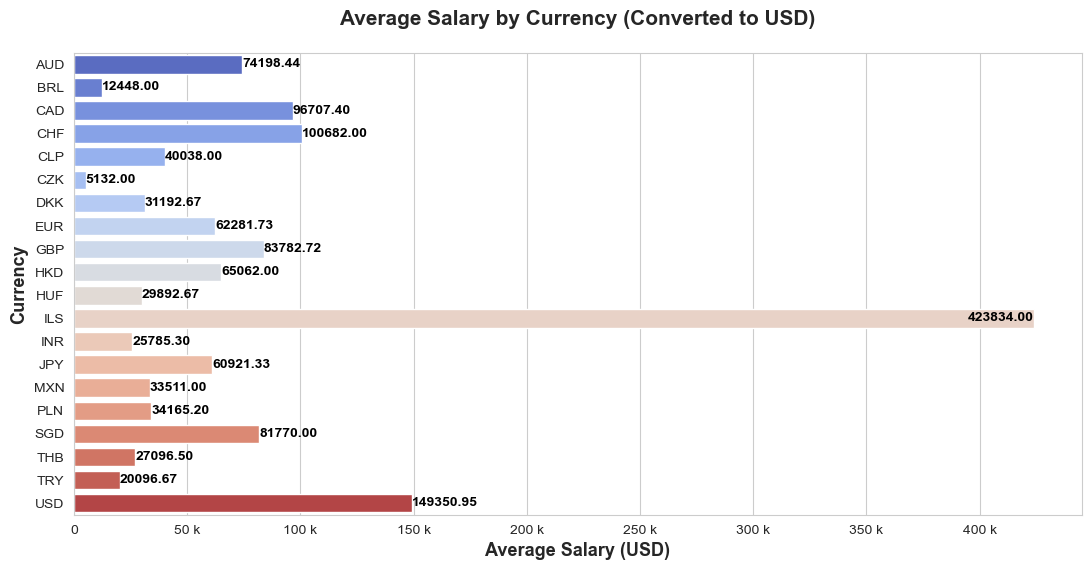

In [29]:
import matplotlib.ticker as ticker

# Group data by 'salary_currency' and calculate the average salary in USD for each currency
currency_salary  = df.groupby('salary_currency')['salary_in_usd'].mean()

# Set the figure size and style
plt.figure(figsize = (13,6))
sns.set_style("whitegrid")

# Create a bar plot
p = sns.barplot(x = currency_salary.values , y  = currency_salary.index, palette = 'coolwarm')

# Set the title of the plot
plt.title('Average Salary by Currency (Converted to USD)', fontsize=15, fontweight='bold', pad=20)

# Set the x-axis label
plt.xlabel('Average Salary (USD)', fontsize=13, fontweight='bold')

# Set the y-axis label
plt.ylabel('Currency', fontsize=13, fontweight='bold')

# Format x-axis
p.xaxis.set_major_formatter(ticker.EngFormatter())

# Add labels to the bars
for i, bar in enumerate(p.containers[0]):
    value = bar.get_width()
    p.text(value,
           bar.get_y() + bar.get_height()/2,
           '{:.2f}'.format(value),
           va='center',
           ha='left' if value < (currency_salary.max() / 2) else 'right',
           color='black',
           fontweight='bold')

# Display the plot
plt.show()

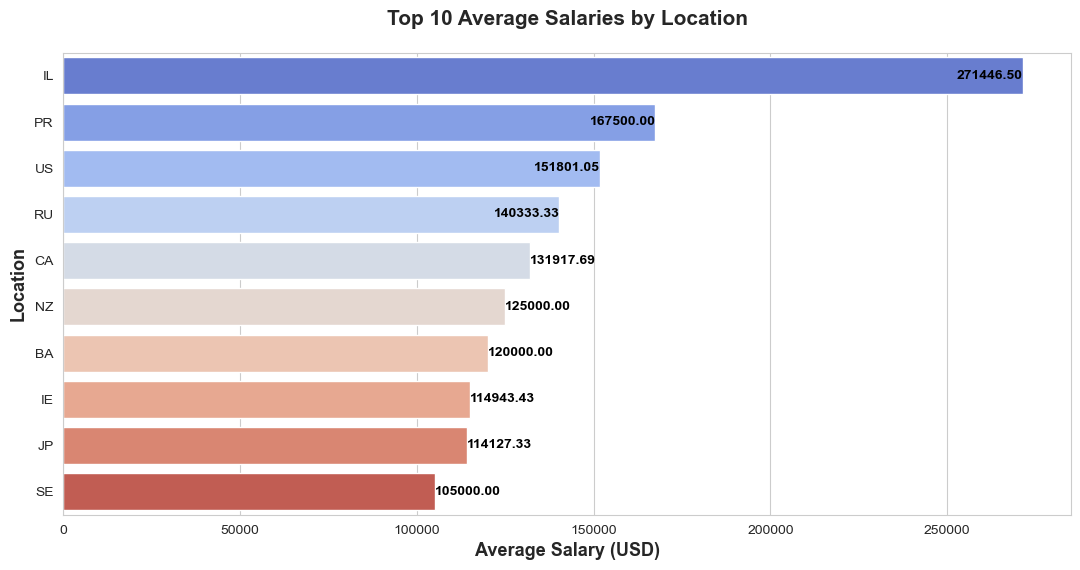

In [31]:
# Group the data by company_location and calculate the mean salary for each location
average_salaries_by_location = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Sort the locations by average salary in descending order
average_salaries_by_location = average_salaries_by_location.sort_values(by='salary_in_usd', ascending=False)

# Select the top N locations to plot
top_n_locations = 10  # You can change this number as needed

# Create a bar chart to visualize average salaries by country
plt.figure(figsize=(13, 6))
sns.set_style("whitegrid")
p = sns.barplot(x='salary_in_usd', y='company_location', data=average_salaries_by_location.head(top_n_locations), palette 
                = 'coolwarm')

# Set the title of the plot
plt.title('Top {} Average Salaries by Location'.format(top_n_locations), fontsize=15, fontweight='bold', pad=20)

# Set the x-axis label
plt.xlabel('Average Salary (USD)', fontsize=13, fontweight='bold')

# Set the y-axis label
plt.ylabel('Location', fontsize=13, fontweight='bold')

# Add labels to the bars
for i, bar in enumerate(p.containers[0]):
    value = bar.get_width()
    p.text(value,
           bar.get_y() + bar.get_height()/2,
           '{:.2f}'.format(value),
           va='center',
           ha='left' if value < (average_salaries_by_location['salary_in_usd'].max() / 2) else 'right',
           color='black',
           fontweight='bold')

# Display the plot
plt.show()


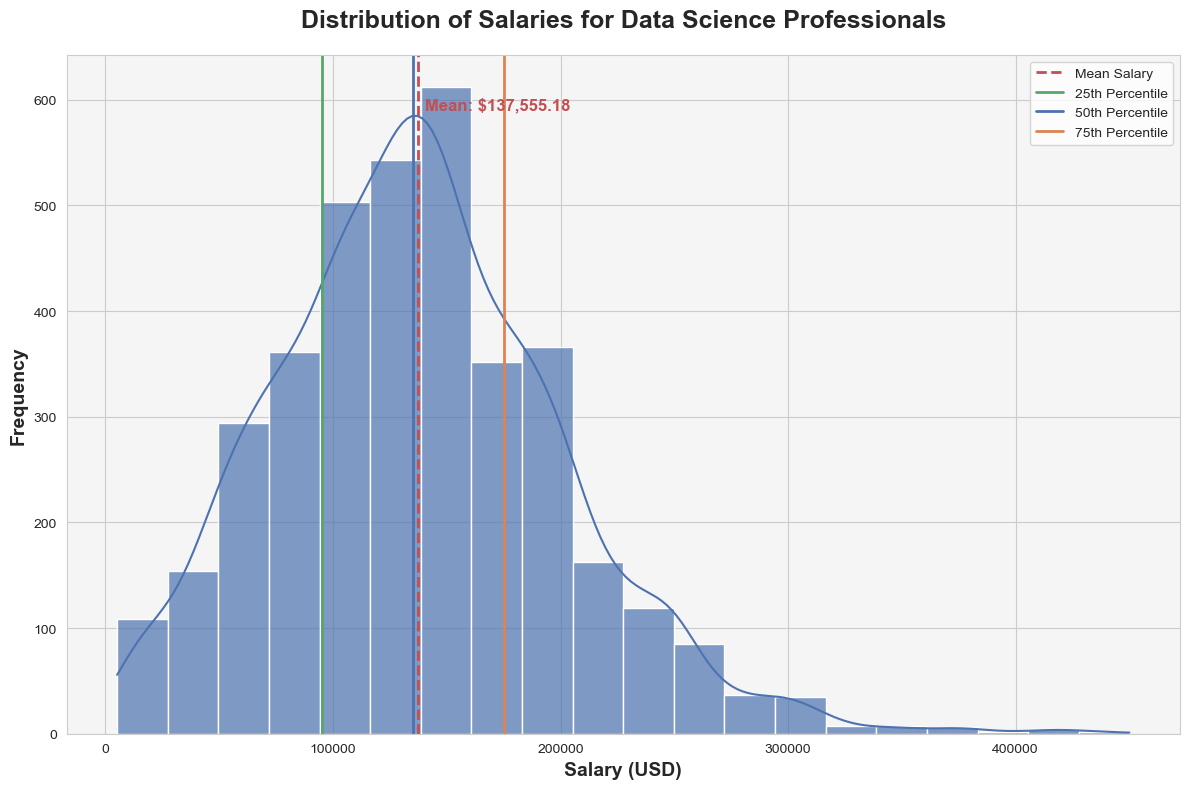

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a custom style
sns.set_style("whitegrid")

# Create a figure and axes with proper spacing
fig, ax = plt.subplots(figsize=(12, 8))

# Create a histogram with a gradient color and added transparency
sns.histplot(df['salary_in_usd'], kde=True, color='#4c72b0', bins=20, ax=ax, edgecolor='white', alpha=0.7)

# Customize labels and title
ax.set_title('Distribution of Salaries for Data Science Professionals', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Salary (USD)', fontsize=14, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')

# Remove y-axis ticks
ax.tick_params(axis='y', which='both', left=False)

# Customize the background color
ax.set_facecolor("#f5f5f5")

# Add a vertical line for the mean salary
mean_salary = df['salary_in_usd'].mean()
plt.axvline(mean_salary, color='#c44e52', linestyle='--', linewidth=2, label='Mean Salary')
plt.text(mean_salary + 3000, ax.get_ylim()[1] * 0.92, 'Mean: ${:,.2f}'.format(mean_salary),
         color='#c44e52', fontsize=12, fontweight='bold')

# Highlight the 25th, 50th, and 75th percentiles with vertical lines
percentiles = df['salary_in_usd'].quantile([0.25, 0.5, 0.75]).values
percentile_colors = ['#55a868', '#4c72b0', '#dd8452']
for i, percentile in enumerate(percentiles):
    plt.axvline(percentile, color=percentile_colors[i], linestyle='-', linewidth=2,
                label=f'{int((i + 1) * 25)}th Percentile')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


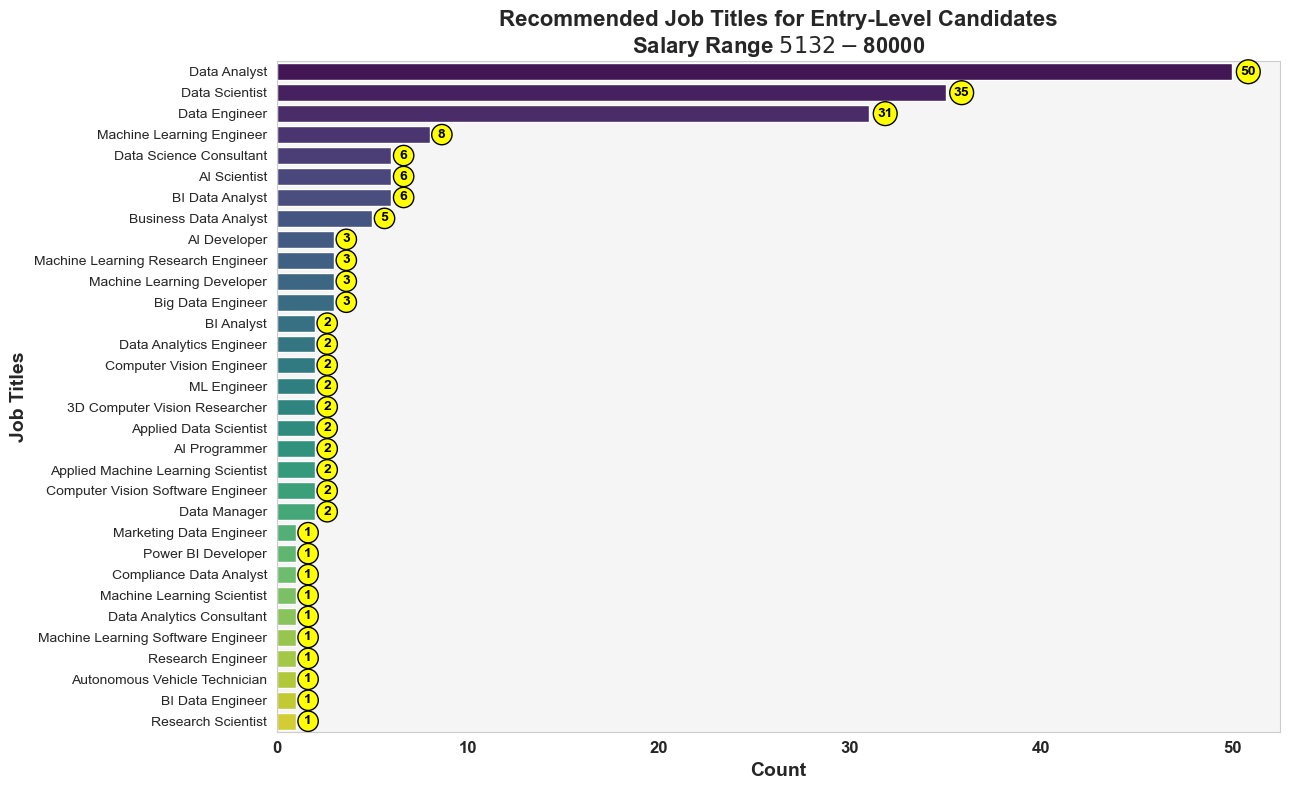

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define candidate criteria
desired_experience_level = 'Entry-Level'
desired_salary_range = (5132, 80000)  # Replace with the desired salary range in USD

# Filter the dataset based on experience level and desired salary range
filtered_df = df[(df['experience_level'] == desired_experience_level) &
                 (df['salary_in_usd'] >= desired_salary_range[0]) &
                 (df['salary_in_usd'] <= desired_salary_range[1])]

# Count the occurrences of each job title
job_title_counts = filtered_df['job_title'].value_counts().reset_index()
job_title_counts.columns = ['Job Title', 'Count']

# Set a custom style
sns.set_style("whitegrid")

# Create a horizontal bar chart using Seaborn with an updated color palette
plt.figure(figsize=(13, 8))
ax = sns.barplot(x='Count', y='Job Title', data=job_title_counts, palette='viridis')

# Customize labels and title
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Job Titles', fontsize=14, fontweight='bold')
plt.title(f'Recommended Job Titles for {desired_experience_level} Candidates\nSalary Range ${desired_salary_range[0]} - ${desired_salary_range[1]}',
          fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontsize=12, fontweight='bold')

# Add labels with count values on the bars
for container in ax.containers:
    ax.bar_label(container, label_type="edge", color="black",
                 padding=6,
                 fontweight='bold',
                 fontsize=10,
                 bbox={'boxstyle': 'circle,pad=0.3', 'facecolor': 'yellow', 'edgecolor': 'black'})

# Customize the background color
ax.set_facecolor("#f5f5f5")

# Remove the grid lines
ax.grid(False)

# Show the chart
plt.tight_layout()
plt.show()


In [36]:
# Define candidate criteria
desired_experience_level = 'Entry-Level'
desired_salary_range = (5000, 80000)  # Replace with the desired salary range in USD
# Filter the dataset based on experience level and desired salary range
filtered_df = df[(df['experience_level'] == desired_experience_level) &
                 (df['salary_in_usd'] >= desired_salary_range[0]) &
                 (df['salary_in_usd'] <= desired_salary_range[1])]
# Count the occurrences of each job title
job_title_counts = filtered_df['job_title'].value_counts().reset_index()
job_title_counts.columns = ['Job Title', 'Count']
# Set a custom style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Count', y='Job Title', data=job_title_counts, palette='viridis')
# Customize labels and title
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Job Titles', fontsize=14, fontweight='bold')

plt.title(f'Recommended Job Titles for {desired_experience_level} Candidates\nSalary Range (in USD) ${desired_salary_range[0]:,.2f} - ${desired_salary_range[1]:,.2f}',
          fontsize=16, fontweight='bold')
# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
# Add labels with count values inside the bars
for container in ax.containers:
    ax.bar_label(container, label_type="center", color="white", fontsize=10, fontweight='bold')
# Customize the background color
ax.set_facecolor("#f5f5f5")
# Remove the grid lines
ax.grid(False)
# Show the chart
plt.tight_layout()
plt.show()

SyntaxError: unterminated string literal (detected at line 19) (52573071.py, line 19)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


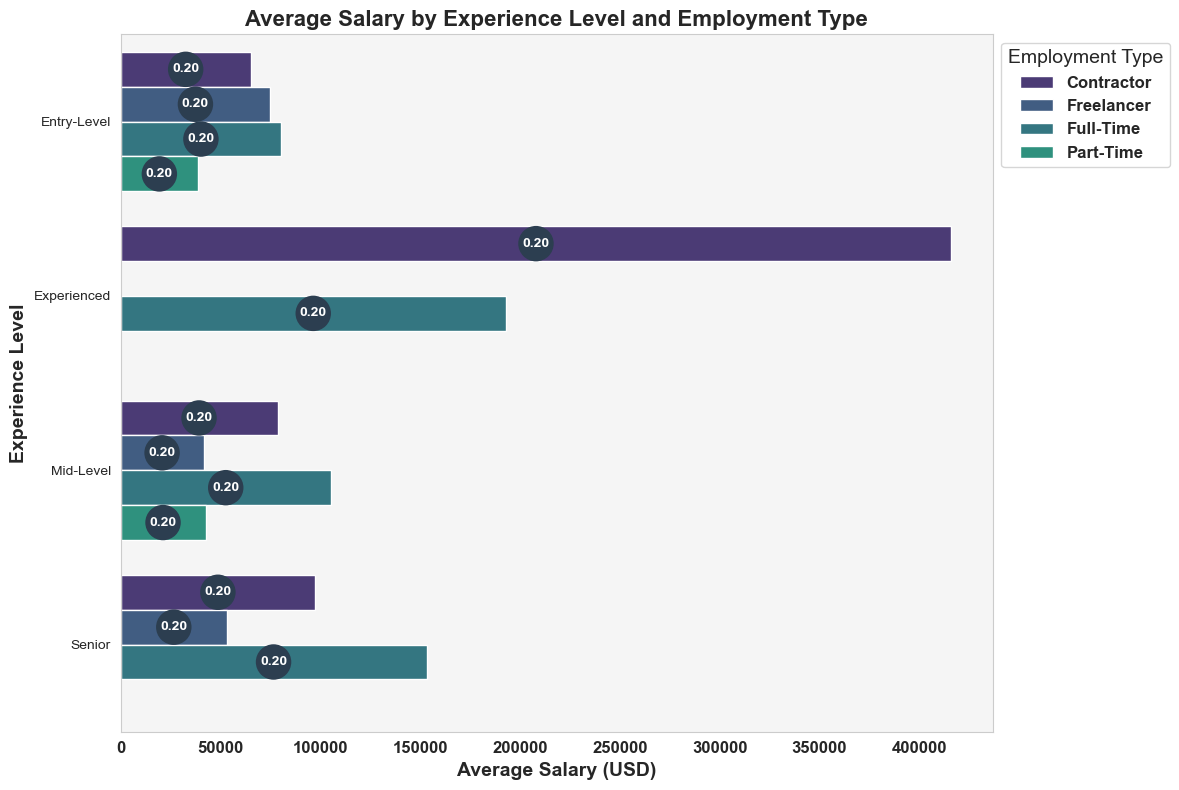

In [82]:
# Calculate average salary for each combination of experience level and employment type
cost_effectiveness = df.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean().reset_index()

# Find the combination with the highest average salary (maximum cost-effectiveness)
best_combination = cost_effectiveness.loc[cost_effectiveness['salary_in_usd'].idxmax()]

# Set a custom style
sns.set_style("whitegrid")

# Create a bar plot using Seaborn with x and y axes swapped
plt.figure(figsize=(14, 8))

# Use a modern color palette for better distinction
sns.set_palette("viridis")

# Create a horizontal bar plot for better readability
ax = sns.barplot(x='salary_in_usd', y='experience_level', hue='employment_type', data=cost_effectiveness, dodge=True)

# Customize labels and title
plt.xlabel('Average Salary (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Experience Level', fontsize=14, fontweight='bold')
plt.title('Average Salary by Experience Level and Employment Type', fontsize=16, fontweight='bold')
plt.xticks(rotation=0, fontsize=12, fontweight='bold')

# Add labels with average salary values inside circles on the bars
for container in ax.containers:
    for patch in container.patches:
        x, y = patch.get_xy()
        width, height = patch.get_width(), patch.get_height()
        value = height if height > 0 else -height
        ax.text(x + width / 2, y + height / 2, f'{value:.2f}', ha='center', va='center',
                color='white', fontweight='bold', fontsize=10,
                bbox=dict(boxstyle='circle', facecolor='#2c3e50', edgecolor='none'))

# Move the legend inside the graph
legend = plt.legend(title='Employment Type', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
for text in legend.get_texts():
    text.set_fontweight('bold')

# Set the background color to a light gray
ax.set_facecolor("#f5f5f5")

# Remove the grid lines
ax.grid(False)

# Adjust layout to make space for the legend
plt.tight_layout(rect=(0, 0, 0.85, 1))

# Show the plot
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


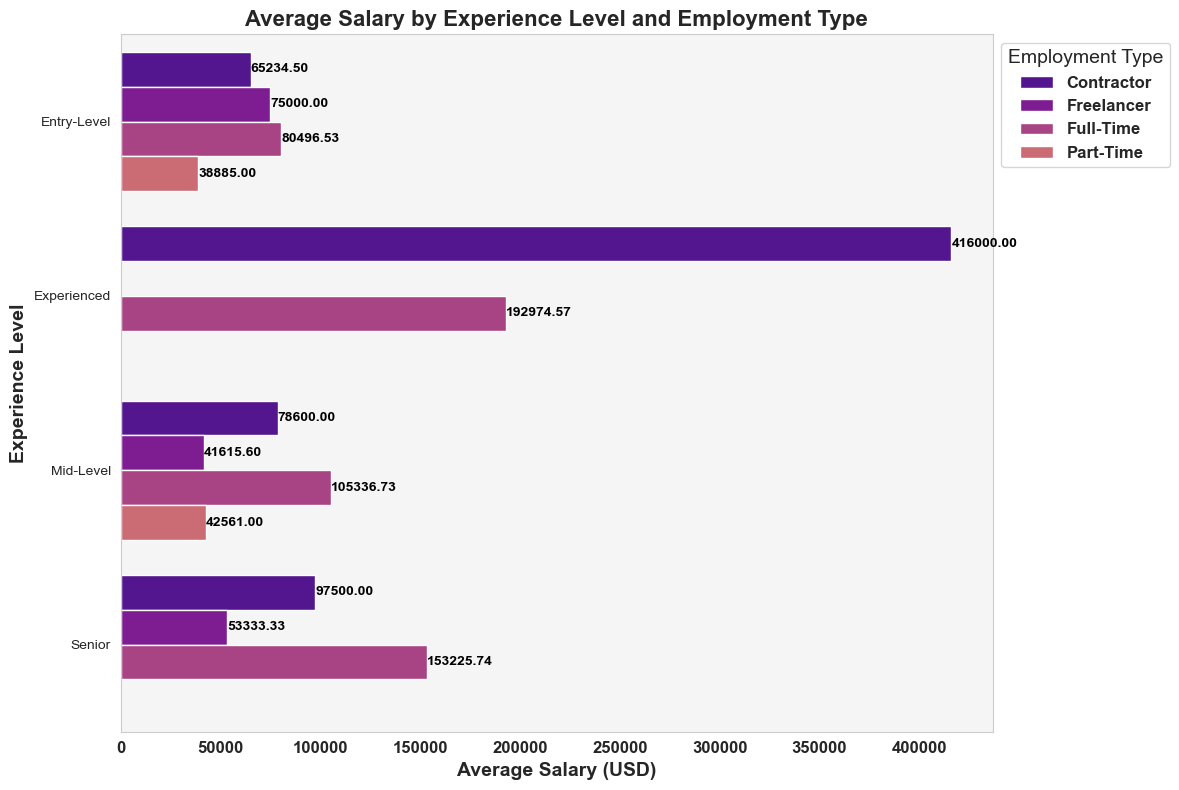

In [83]:
# Calculate average salary for each combination of experience level and employment type
cost_effectiveness = df.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean().reset_index()

# Find the combination with the highest average salary (maximum cost-effectiveness)
best_combination = cost_effectiveness.loc[cost_effectiveness['salary_in_usd'].idxmax()]

# Set a custom style
sns.set_style("whitegrid")

# Create a bar plot using Seaborn with x and y axes swapped
plt.figure(figsize=(14, 8))

# Use a modern color palette for better distinction
sns.set_palette("plasma")

# Create a horizontal bar plot for better readability
ax = sns.barplot(x='salary_in_usd', y='experience_level', hue='employment_type', data=cost_effectiveness, dodge=True)

# Customize labels and title
plt.xlabel('Average Salary (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Experience Level', fontsize=14, fontweight='bold')
plt.title('Average Salary by Experience Level and Employment Type', fontsize=16, fontweight='bold')
plt.xticks(rotation=0, fontsize=12, fontweight='bold')

# Add labels with average salary values in front of the bars
for container in ax.containers:
    for bar in container:
        value = bar.get_width() if bar.get_width() > 0 else -bar.get_width()
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center',
                color='black' if bar.get_width() > 0 else 'white',
                fontweight='bold', fontsize=10, ha='left' if bar.get_width() > 0 else 'right')

# Move the legend inside the graph
legend = plt.legend(title='Employment Type', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
for text in legend.get_texts():
    text.set_fontweight('bold')

# Set the background color to a light gray
ax.set_facecolor("#f5f5f5")

# Remove the grid lines
ax.grid(False)

# Adjust layout to make space for the legend
plt.tight_layout(rect=(0, 0, 0.85, 1))

# Show the plot
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

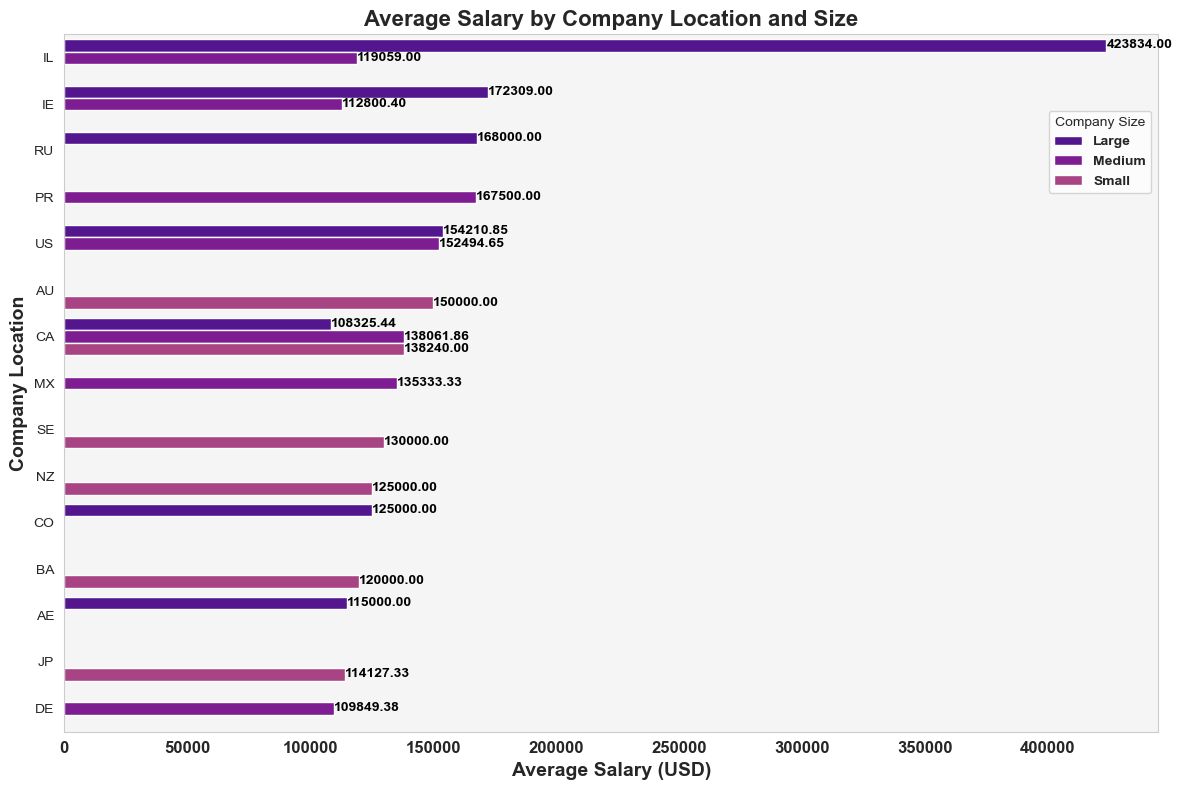

In [92]:
# Calculate average salary for each combination of company location and size
cost_effectiveness = df.groupby(['company_location', 'company_size'])['salary_in_usd'].mean().reset_index().sort_values(by='salary_in_usd', ascending=False)[:20]

# Find the combination with the highest average salary (maximum cost-effectiveness)
best_combination = cost_effectiveness.loc[cost_effectiveness['salary_in_usd'].idxmax()]

# Set a custom style
sns.set_style("whitegrid")

# Create a bar plot using Seaborn with x and y axes swapped
plt.figure(figsize=(12, 8))

# Use a modern color palette for better distinction
sns.set_palette("plasma")

# Create a horizontal bar plot for better readability
ax = sns.barplot(x='salary_in_usd', y='company_location', hue='company_size', data=cost_effectiveness, dodge=True)

# Customize labels and title
plt.xlabel('Average Salary (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Company Location', fontsize=14, fontweight='bold')
plt.title('Average Salary by Company Location and Size', fontsize=16, fontweight='bold')
plt.xticks(rotation=0, fontsize=12, fontweight='bold')

# Add labels with average salary values in front of the bars
for container in ax.containers:
    for bar in container:
        value = bar.get_width() if bar.get_width() > 0 else -bar.get_width()
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center',
                color='black' if bar.get_width() > 0 else 'white',
                fontweight='bold', fontsize=10, ha='left' if bar.get_width() > 0 else 'right')

# Move the legend inside the graph and lower its position
legend = plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper right', bbox_to_anchor=(1.0, 0.9))
for text in legend.get_texts():
    text.set_fontweight('bold')

# Set the background color to a light gray
ax.set_facecolor("#f5f5f5")

# Remove the grid lines
ax.grid(False)

# Show the plot
plt.tight_layout()
plt.show()